In [149]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 160
import matplotlib.pyplot as plt
import os

days_list={16, 18, 21, 21.5, 23, 23.5, 24, 25, 32, 33, 35, 35.5, 37, 37.5, 38, 39, 46, 47, 50, 50.5, 52, 52.5, 53, 54}

In [150]:
#Do you want to analyze healthy or uc

analyze_healthy=1 #else change to 0 to run uc

healthy_folder='../../datasets/gibson/healthy/raw_tables/'
uc_folder='../../datasets/gibson/uc/raw_tables/'

if analyze_healthy==1:
    folder=healthy_folder
    name='healthy'
else:
   folder=uc_folder
   name='uc'



counts=pd.read_csv(folder+'counts.tsv',sep='\t', index_col=0)
counts.index.name=None
counts.head()



,10-D0AM,10-D10,10-D11,10-D14,10-D16,10-D18,10-D1AM,10-D1PM,10-D21AM,10-D21PM,...,M2-D8-2A,M2-D8-2B,M2-D8-3A,M2-D8-3B,M2-D9-1A,M2-D9-1B,M2-D9-2A,M2-D9-2B,M2-D9-3A,M2-D9-3B
ASV_1,22,10503,21726,25990,21572,21352,17823,16916,26669,14875,...,3591,3325,3286,3866,176,176,213,141,205,135
ASV_2,21,9319,17515,20188,14972,14868,6627,7697,20212,12791,...,64,68,75,82,104,64,124,100,107,98
ASV_3,3,9380,17748,20899,15247,17260,45,1078,21997,20501,...,0,0,0,0,0,0,0,0,0,0
ASV_4,0,0,7,24,5,20,0,0,0,0,...,1721,2131,2124,2348,3323,2908,3830,3097,3626,3340
ASV_5,0,0,0,0,0,0,0,0,0,0,...,14950,13720,14355,17185,13421,11304,19043,15768,18249,12639


In [151]:




taxonomy=pd.read_csv(folder+'rdp_species.tsv',sep='\t', index_col=0)
taxonomy=taxonomy.fillna('unknown')
taxonomy.head()

,sequence,Kingdom,Phylum,Class,Order,Family,Genus,Species
name,,,,,,,,
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,unknown
ASV_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,cellulosilyticus/timonensis
ASV_5,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unknown


In [152]:
taxonomy_temp=taxonomy.copy()
taxonomy_temp.insert(8, 'ASV', pd.Series(np.array(taxonomy.index), index=taxonomy.index))
taxonomy_temp

,sequence,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASV
name,,,,,,,,,
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,unknown,ASV_1
ASV_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus,ASV_2
ASV_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila,ASV_3
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,cellulosilyticus/timonensis,ASV_4
ASV_5,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unknown,ASV_5
...,...,...,...,...,...,...,...,...,...
ASV_1469,TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Parabacteroides,unknown,ASV_1469
ASV_1470,TACGTAGGGGGCAAGCGTTATCCGGAATCATTGGGCGTAAAGGGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unknown,ASV_1470
ASV_1471,TACGTAGGGGGCAAGCGTTATCCGGAATCATTGGGCGTAAAGGGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unknown,ASV_1471


In [153]:
taxonomy_temp = taxonomy_temp.drop('sequence', axis=1)
taxonomy_temp

,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASV
name,,,,,,,,
ASV_1,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,unknown,ASV_1
ASV_2,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus,ASV_2
ASV_3,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila,ASV_3
ASV_4,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,cellulosilyticus/timonensis,ASV_4
ASV_5,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unknown,ASV_5
...,...,...,...,...,...,...,...,...
ASV_1469,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Parabacteroides,unknown,ASV_1469
ASV_1470,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unknown,ASV_1470
ASV_1471,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unknown,ASV_1471


https://stackoverflow.com/questions/52761376/how-to-map-key-to-multiple-values-to-dataframe-column

In [154]:
def window(x):
    if x<=21.5:
        y=0.0
    elif x<=28.5:
        y=1.0
    elif x<=35.5:
        y=1.5
    elif x<=42.5:
        y=2.0
    elif x<=50.5:
        y=2.5
    else:
        y=3.0
    return y

In [155]:
index=pd.MultiIndex.from_frame(taxonomy_temp)

In [156]:
meta=pd.read_csv(folder+'metadata.tsv',sep='\t', index_col=0)
meta.index.name = 'sample'
meta

,subject,time
sample,,
10-D0AM,10,0.0
10-D10,10,10.0
10-D11,10,11.0
10-D14,10,14.0
10-D16,10,16.0
...,...,...
M2-D9-1B,M2-D9,1.0
M2-D9-2A,M2-D9,2.0
M2-D9-2B,M2-D9,3.0


In [157]:
meta.reset_index(inplace=True)
meta

,sample,subject,time
0,10-D0AM,10,0.0
1,10-D10,10,10.0
2,10-D11,10,11.0
3,10-D14,10,14.0
4,10-D16,10,16.0
...,...,...,...
395,M2-D9-1B,M2-D9,1.0
396,M2-D9-2A,M2-D9,2.0
397,M2-D9-2B,M2-D9,3.0
398,M2-D9-3A,M2-D9,4.0


In [158]:
meta['window']=meta['time'].apply(window)
meta[21:40]

,sample,subject,time,window
21,10-D30PM,10,30.5,1.5
22,10-D31AM,10,31.0,1.5
23,10-D31PM,10,31.5,1.5
24,10-D32,10,32.0,1.5
25,10-D33,10,33.0,1.5
26,10-D35AM,10,35.0,1.5
27,10-D35PM,10,35.5,1.5
28,10-D36AM,10,36.0,2.0
29,10-D36PM,10,36.5,2.0
30,10-D37AM,10,37.0,2.0


In [159]:
columns=pd.MultiIndex.from_frame(meta)
c_names=['sample', 'subject', 'time', 'window']
print(columns)
print(c_names)

MultiIndex([( '10-D0AM',    '10',  0.0, 0.0),
            (  '10-D10',    '10', 10.0, 0.0),
            (  '10-D11',    '10', 11.0, 0.0),
            (  '10-D14',    '10', 14.0, 0.0),
            (  '10-D16',    '10', 16.0, 0.0),
            (  '10-D18',    '10', 18.0, 0.0),
            ( '10-D1AM',    '10',  1.0, 0.0),
            ( '10-D1PM',    '10',  1.5, 0.0),
            ('10-D21AM',    '10', 21.0, 0.0),
            ('10-D21PM',    '10', 21.5, 0.0),
            ...
            ('M2-D8-2A', 'M2-D8',  2.0, 0.0),
            ('M2-D8-2B', 'M2-D8',  3.0, 0.0),
            ('M2-D8-3A', 'M2-D8',  4.0, 0.0),
            ('M2-D8-3B', 'M2-D8',  5.0, 0.0),
            ('M2-D9-1A', 'M2-D9',  0.0, 0.0),
            ('M2-D9-1B', 'M2-D9',  1.0, 0.0),
            ('M2-D9-2A', 'M2-D9',  2.0, 0.0),
            ('M2-D9-2B', 'M2-D9',  3.0, 0.0),
            ('M2-D9-3A', 'M2-D9',  4.0, 0.0),
            ('M2-D9-3B', 'M2-D9',  5.0, 0.0)],
           names=['sample', 'subject', 'time', 'window'], lengt

In [160]:
df=pd.DataFrame(data=counts.to_numpy(), index=index, columns=columns)
df_main=df.loc[:,df.columns.get_level_values(2).isin(days_list)].groupby(level=['subject', 'window'], axis=1, dropna=False).sum()
df_main.head()

/var/folders/2q/h18fp5w514v9v5zm3s1fdtmc0000gp/T/ipykernel_18275/3580813653.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_main=df.loc[:,df.columns.get_level_values(2).isin(days_list)].groupby(level=['subject', 'window'], axis=1, dropna=False).sum()


subject                                                                                                                        10  \
window                                                                                                                        0.0   
Kingdom  Phylum          Class            Order              Family          Genus       Species                     ASV            
Bacteria Bacteroidetes   Bacteroidia      Bacteroidales      Bacteroidaceae  Phocaeicola unknown                     ASV_1  84468   
                                                                             Bacteroides ovatus                      ASV_2  62843   
         Verrucomicrobia Verrucomicrobiae Verrucomicrobiales Akkermansiaceae Akkermansia muciniphila                 ASV_3  75005   
         Bacteroidetes   Bacteroidia      Bacteroidales      Bacteroidaceae  Bacteroides cellulosilyticus/timonensis ASV_4     25   
         Verrucomicrobia Verrucomicrobiae Verrucomicrobiales Akkermansiaceae Akkermansia unknown                     ASV_5      0   

subject                                                                                                                            \
window                                                                                                                        1.0   
Kingdom  Phylum          Class            Order              Family          Genus       Species                     ASV            
Bacteria Bacteroidetes   Bacteroidia      Bacteroidales      Bacteroidaceae  Phocaeicola unknown                     ASV_1  26088   
                                                                             Bacteroides ovatus                      ASV_2   1950   
         Verrucomicrobia Verrucomicrobiae Verrucomicrobiales Akkermansiaceae Akkermansia muciniphila                 ASV_3  86623   
         Bacteroidetes   Bacteroidia      Bacteroidales      Bacteroidaceae  Bacteroides cellulosilyticus/timonensis ASV_4    370   
         Verrucomicrobia Verrucomicrobiae Verrucomicrobiales Akkermansiaceae Akkermansia unknown                     ASV_5  36510   

subject                                                                                                                            \
window                                                                                                                        1.5   
Kingdom  Phylum          Class            Order              Family          Genus       Species                     ASV            
Bacteria Bacteroidetes   Bacteroidia      Bacteroidales      Bacteroidaceae  Phocaeicola unknown                     ASV_1  52274   
                                                                             Bacteroides ovatus                      ASV_2  38394   
         Verrucomicrobia Verrucomicrobiae Verrucomicrobiales Akkermansiaceae Akkermansia muciniphila                 ASV_3  60165   
         Bacteroidetes   Bacteroidia      Bacteroidales      Bacteroidaceae  Bacteroides cellulosilyticus/timonensis ASV_4    129   
         Verrucomicrobia Verrucomicrobiae Verrucomicrobiales Akkermansiaceae Akkermansia unknown                     ASV_5      0   

subject                                                                                                                             \
window                                                                                                                         2.0   
Kingdom  Phylum          Class            Order              Family          Genus       Species                     ASV             
Bacteria Bacteroidetes   Bacteroidia      Bacteroidales      Bacteroidaceae  Phocaeicola unknown                     ASV_1   13602   
                                                                             Bacteroides ovatus                      ASV_2  104133   
         Verrucomicrobia Verrucomicrobiae Verrucomicrobiales Akkermansiaceae Akkermansia muciniphila                 ASV_3   75988   
 

/var/folders/2q/h18fp5w514v9v5zm3s1fdtmc0000gp/T/ipykernel_18275/779687037.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_main=df.loc[:,df.columns.get_level_values(2).isin(days_list)].groupby(level=['subject', 'window'], axis=1, dropna=False).sum()


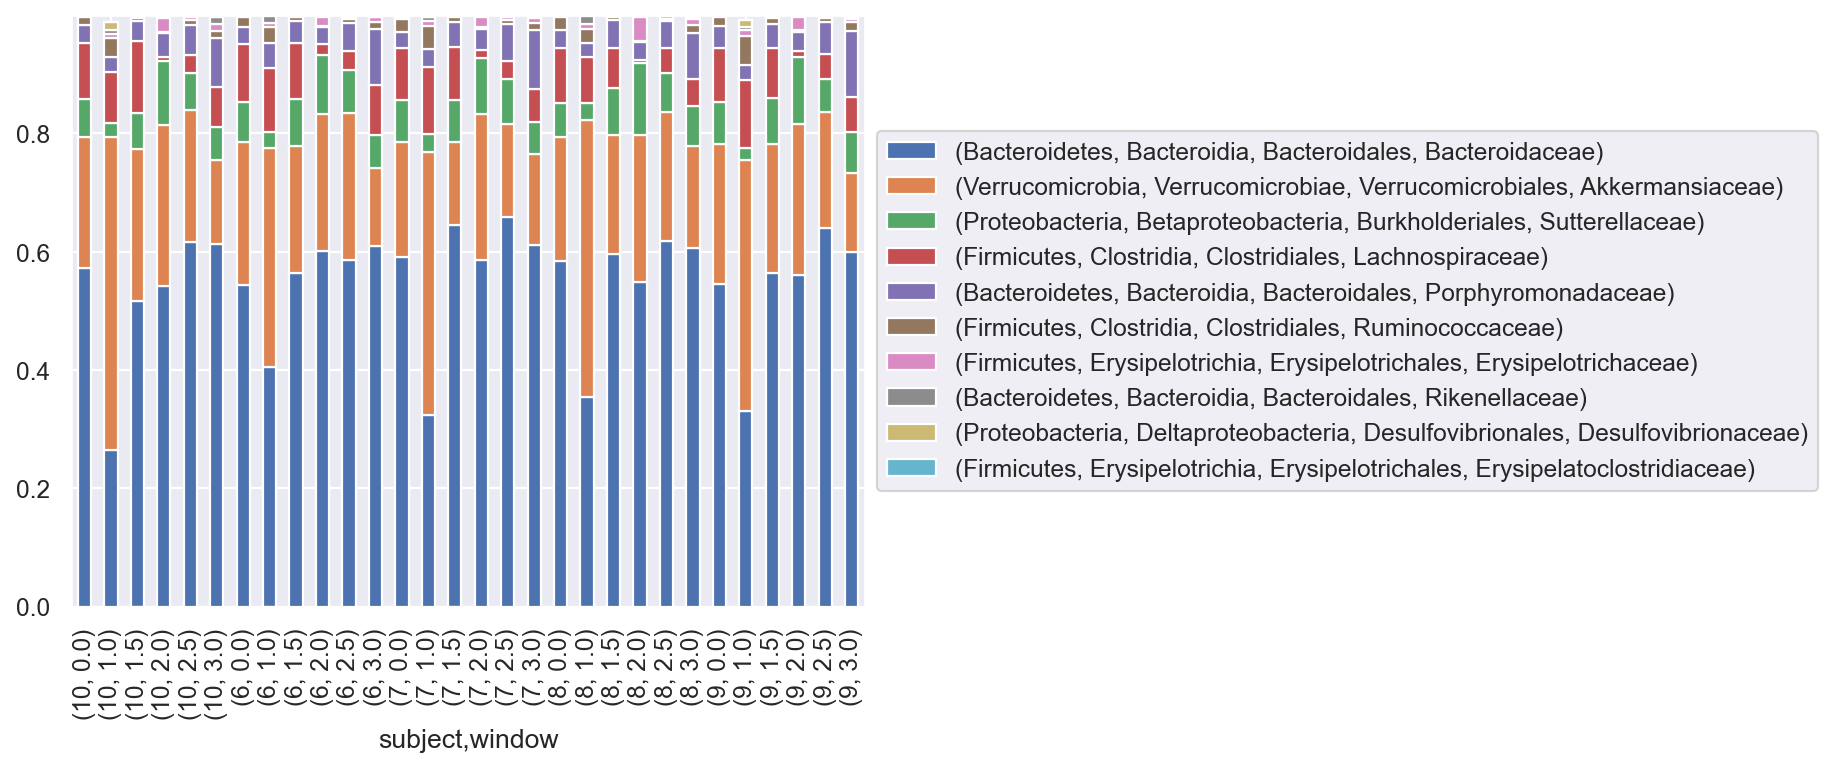

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Actinobacteria Actinobacteria Bifidobacteriales Bifidobacteriaceae,5,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actinobacteria Actinobacteria Geodermatophilales Geodermatophilaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actinobacteria Actinobacteria Mycobacteriales Lawsonellaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actinobacteria Actinobacteria Propionibacteriales Nocardioidaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actinobacteria Actinobacteria Streptosporangiales Nocardiopsaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Proteobacteria Oligoflexia Bacteriovoracales Bacteriovoracaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Proteobacteria unknown unknown unknown,0,0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
Verrucomicrobia Verrucomicrobiae Verrucomicrobiales Akkermansiaceae,75042,123226,60216,76000,65882,32974,105890,74674,60284,68277,...,54545,75128,62908,36561,84132,84308,59170,73382,59516,29722
Verrucomicrobia Verrucomicrobiae Verrucomicrobiales unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
df=pd.DataFrame(data=counts.to_numpy(), index=index, columns=columns)

df=df.groupby(level=['Phylum','Class','Order','Family'], dropna=False).sum()
df.head()

df_main=df.loc[:,df.columns.get_level_values(2).isin(days_list)].groupby(level=['subject', 'window'], axis=1, dropna=False).sum()



df_main_rel=df_main/df_main.sum()
top10=df_main_rel.sum(1).nlargest(10).index


ax1 = df_main_rel.loc[top10].transpose().plot.bar(stacked=True)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

index_out=df_main.index.get_level_values(0).values + ' ' + df_main.index.get_level_values(1).values + ' ' + df_main.index.get_level_values(2).values + ' ' + df_main.index.get_level_values(3).values
counts_out=pd.DataFrame(data=df_main.to_numpy(), index=index_out)
counts_out

In [162]:
meta_out=df_main.columns.to_frame(index=None)
meta_out

,subject,window
0,10,0.0
1,10,1.0
2,10,1.5
3,10,2.0
4,10,2.5
5,10,3.0
6,6,0.0
7,6,1.0
8,6,1.5
9,6,2.0


In [164]:
df=pd.DataFrame(data=counts.to_numpy(), index=index, columns=columns)

df=df.groupby(level=['Phylum'], dropna=False).sum()
df.head()

df_main=df.loc[:,df.columns.get_level_values(2).isin(days_list)].groupby(level=['subject', 'window'], axis=1, dropna=False).sum()


index_out=df_main.index.get_level_values(0).values
counts_out=pd.DataFrame(data=df_main.to_numpy(), index=index_out)
counts_out

/var/folders/2q/h18fp5w514v9v5zm3s1fdtmc0000gp/T/ipykernel_18275/526350837.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_main=df.loc[:,df.columns.get_level_values(2).isin(days_list)].groupby(level=['subject', 'window'], axis=1, dropna=False).sum()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Actinobacteria,5,14,0,0,2,0,16,84,1,0,...,0,0,0,2,1,120,0,0,0,1
Bacteroidetes,204960,68919,129325,162953,197338,163094,250616,92364,169378,186116,...,173687,176721,191969,145155,207406,71622,165155,170622,210429,158081
Chloroflexi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyanobacteria/Chloroplast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Deinococcus-Thermus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Euryarchaeota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Firmicutes,37435,32113,30291,9588,13240,21757,51167,28866,29353,10808,...,20104,14937,14643,15235,38421,35712,26478,10653,15894,18319
Fusobacteria,2,0,0,0,2,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Lentisphaerae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Proteobacteria,21572,8488,14260,30167,18880,12913,29583,5330,22423,29670,...,21519,37201,18764,14498,25517,6292,21276,32287,17345,15580


In [163]:
from pathlib import Path

outdir = Path().resolve().parent.parent / "datasets" / "gibson"
counts_out.to_csv(outdir / name / f'{name}_of_counts.csv')
meta_out.to_csv(outdir / name / f'{name}_of_meta.csv')

In [165]:
meta_out=df_main.columns.to_frame(index=None)
meta_out

,subject,window
0,10,0.0
1,10,1.0
2,10,1.5
3,10,2.0
4,10,2.5
5,10,3.0
6,6,0.0
7,6,1.0
8,6,1.5
9,6,2.0


In [166]:
counts_out.to_csv(outdir / name / f'{name}_phylum_counts.csv')
meta_out.to_csv(outdir / name / f'{name}_phylum_meta.csv')